In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## CHARGEMENT DES DONNÉES

In [3]:
df = pd.read_csv('../results_banking_problem.csv')

df.head()

,monnaie,nombreAnnees,prec
0,-6.700000e+04,10,2
1,-6.000000e+62,50,2
2,-1.600000e+80,60,2
3,-4.900000e+107,75,2
4,9.744640e-02,10,10


## SÉPARATION TRAIN / TEST

In [4]:
X = df[["nombreAnnees","prec"]]
y = df["monnaie"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



## TRAINING DU DECISION TREE

In [5]:
model = DecisionTreeRegressor(max_depth=3, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE :", mean_squared_error(y_test, y_pred))
print("R2  :", r2_score(y_test, y_pred))


MSE : 4.853427367719386e+178
R2  : -5.337380541807793e+53


## VISUALISATION DE L'ARBRE

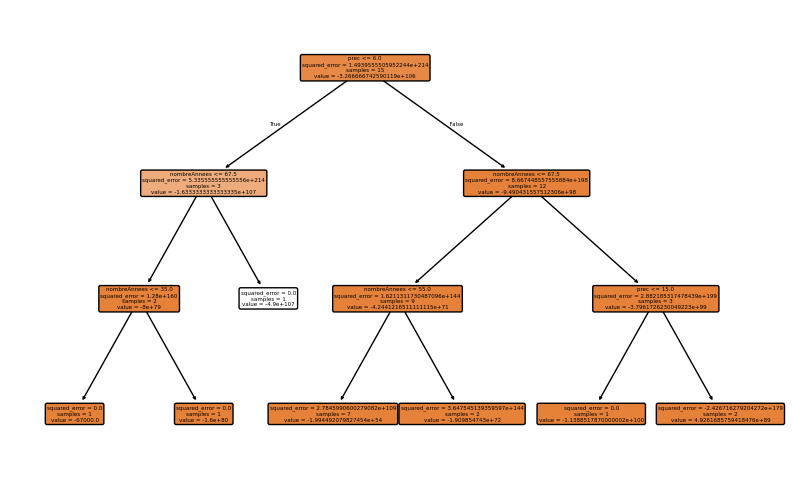

In [6]:
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

## RÈGLES TEXTUELLES (interprétables)

In [7]:
rules = export_text(model, feature_names=list(X.columns))
print(rules)

|--- prec <= 6.00
|   |--- nombreAnnees <= 67.50
|   |   |--- nombreAnnees <= 35.00
|   |   |   |--- value: [-67000.00]
|   |   |--- nombreAnnees >  35.00
|   |   |   |--- value: [-159999999999999994776961200105528307563942457706399678612256393898128051550552064.00]
|   |--- nombreAnnees >  67.50
|   |   |--- value: [-490000000000000014052099889663241861098937131495315997233701506378160482330108633139835328329488404586692608.00]
|--- prec >  6.00
|   |--- nombreAnnees <= 67.50
|   |   |--- nombreAnnees <= 55.00
|   |   |   |--- value: [-1994492079827454107299878064936875341818316536684740608.00]
|   |   |--- nombreAnnees >  55.00
|   |   |   |--- value: [-1909854743000000167909485294036883308167297954626849755097086719990693888.00]
|   |--- nombreAnnees >  67.50
|   |   |--- prec <= 15.00
|   |   |   |--- value: [-11388517870000001723554835827727701226949960242122683777568251018679825472325906619689601928924233728.00]
|   |   |--- prec >  15.00
|   |   |   |--- value: [4926168575941847